In [ ]:
import os
import torch
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    # transforms.Resize((224, 224)),  # works for all models
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.2435, 0.2616))  # CIFAR-10 mean and std
])

test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

print(f'Total number of images in CIFAR 10 test_loader: {len(test_dataset)}')

100%|██████████| 170498071/170498071 [00:11<00:00, 15324283.40it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Total number of images in CIFAR 10 test_loader: 10000


In [ ]:
def load_image(image_input):
    if not isinstance(image_input, torch.Tensor):
        image = Image.open(image_input)
        image = image.resize((224, 224), Image.LANCZOS)
        image_array = np.array(image)
    else:  #tensors from dataset are already resized
      image = image_input
      if image_input.dim() == 4:  #extra batch dimension
        image_array = image_input.squeeze(0).cpu().numpy()
      else:
        image_array = image_input.cpu().numpy()


    if isinstance(image_input, torch.Tensor):  #transpose the tensor from dataset from viewing in plot if required
      image_array = np.transpose(image_array,(1, 2, 0))  # Convert CHW to HWC

    return image_array

# Creating & Saving Color Shifted Cifar 10 Dataset (1 min)

In [ ]:
def apply_yellow_tint(img_tensor):
    img_np = img_tensor.numpy()  # Convert to numpy array
    img_np[0, :, :] = np.clip(img_np[0, :, :] + 0.5, 0, 1)  # Increase Red channel
    img_np[1, :, :] = np.clip(img_np[1, :, :] + 0.5, 0, 1)  # Increase Green channel
    img_np[2, :, :] = np.clip(img_np[2, :, :] - 0.5, 0, 1)  # Decrease Blue channel
    img_np = torch.tensor(img_np)  # Convert back to tensor
    return img_np

colored_test_images = []
colored_test_labels = []
resize_transform = transforms.Resize((224, 224))

for i, (img, label) in enumerate(test_dataset):
    img = resize_transform(img)

    # plt.figure(figsize=(10, 5))  # Set the figure size

    # plt.subplot(1, 2, 1)
    # image_pil = load_image(img)
    # # image_pil = transforms.ToPILImage()(img)
    # plt.imshow(image_pil)
    # plt.axis('off')

    yellow_img = apply_yellow_tint(img)  # Apply yellow color shift

    # plt.subplot(1, 2, 2)
    # colored_image_pil = load_image(yellow_img)
    # # colored_image_pil = transforms.ToPILImage()(yellow_img)
    # plt.imshow(colored_image_pil)
    # plt.axis('off')

    # plt.show()

    colored_test_images.append(yellow_img)
    colored_test_labels.append(label)

In [ ]:
print(type(colored_test_images), type(colored_test_labels))
print(type(colored_test_images[0]), type(colored_test_labels[0]))
print(colored_test_images[0].shape)

<class 'list'> <class 'list'>
<class 'torch.Tensor'> <class 'int'>
torch.Size([3, 224, 224])


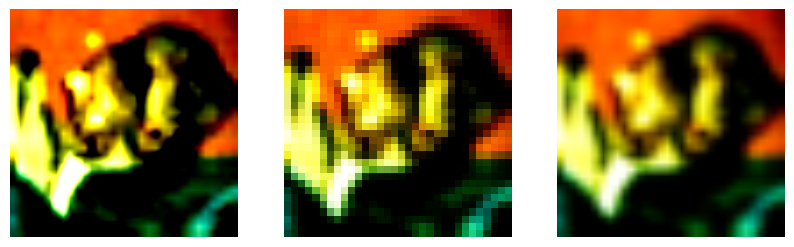

In [ ]:
yellow_img = colored_test_images[0]

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
colored_image_pil = transforms.ToPILImage()(yellow_img)
plt.imshow(colored_image_pil)
plt.axis('off')

downsize_transform = transforms.Resize((32, 32))
upsize_transform = transforms.Resize((224, 224))

yellow_img = downsize_transform(yellow_img)
plt.subplot(1, 3, 2)
colored_image_pil = transforms.ToPILImage()(yellow_img)
plt.imshow(colored_image_pil)
plt.axis('off')

yellow_img = upsize_transform(yellow_img)
plt.subplot(1, 3, 3)
colored_image_pil = transforms.ToPILImage()(yellow_img)
plt.imshow(colored_image_pil)
plt.axis('off')

plt.show()

In [ ]:
# Creating folders
directory_name = 'generated_dataset/images'  # Change this to your desired folder name
full_path = os.path.join('/content', directory_name)
os.makedirs(full_path, exist_ok=True)
file_path = '/content/generated_dataset/labels.txt'
with open(file_path, 'w') as f:
    pass
print(f"Empty file created at: {file_path}")

Empty file created at: /content/generated_dataset/labels.txt


In [ ]:
labels_file = 'generated_dataset/labels.txt'
downsize_transform = transforms.Resize((32, 32))

with open(labels_file, 'w') as f:
    for idx, (image_tensor, label) in enumerate(zip(colored_test_images, colored_test_labels)):
        image_tensor = downsize_transform(image_tensor)

        # Create the file name
        image_file_name = f'img_{idx:04d}.pt'
        image_path = os.path.join(directory_name, image_file_name)

        # Save the image tensor
        torch.save(image_tensor, image_path)

        # Write the image file name and its corresponding label to the labels.txt file
        f.write(f'{image_file_name} {label}\n')

In [ ]:
!zip -r /content/generated_dataset/images.zip /content/generated_dataset

Streaming output truncated to the last 5000 lines.
  adding: content/generated_dataset/images/img_3125.pt (deflated 53%)
  adding: content/generated_dataset/images/img_4844.pt (deflated 53%)
  adding: content/generated_dataset/images/img_2394.pt (deflated 48%)
  adding: content/generated_dataset/images/img_1348.pt (deflated 61%)
  adding: content/generated_dataset/images/img_2848.pt (deflated 45%)
  adding: content/generated_dataset/images/img_4126.pt (deflated 52%)
  adding: content/generated_dataset/images/img_6714.pt (deflated 59%)
  adding: content/generated_dataset/images/img_3907.pt (deflated 49%)
  adding: content/generated_dataset/images/img_2769.pt (deflated 49%)
  adding: content/generated_dataset/images/img_0024.pt (deflated 48%)
  adding: content/generated_dataset/images/img_7990.pt (deflated 46%)
  adding: content/generated_dataset/images/img_8475.pt (deflated 65%)
  adding: content/generated_dataset/images/img_7368.pt (deflated 45%)
  adding: content/generated_dataset/ima

In [ ]:
tensor_path = '/content/generated_dataset/images/img_0100.pt'  # Adjust this to your desired image tensor
img_tensor = torch.load(tensor_path)
img_tensor = upsize_transform(img_tensor)
img  = load_image(img_tensor)
plt.imshow(img)
plt.axis('off')  # Remove axis lines and labels
plt.show()